# The pandemic analysis

In [1]:
!pip install pycountry_convert==0.7.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import pycountry_convert as pc

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/mansont/datasets-tests/main/covid19_confirmed_global.csv")

In [7]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    
    except:
        return None

In [8]:
countries = df.groupby("Country/Region").sum().drop(['Lat', 'Long'], axis=1).reset_index().copy()

In [9]:
countries["CONTINENT"] = countries.apply(
    lambda x: country_to_continent(x['Country/Region']), axis=1
)

In [10]:
countries[['Country/Region', 'CONTINENT']]

,Country/Region,CONTINENT
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
187,Vietnam,Asia
188,West Bank and Gaza,None
189,Yemen,Asia
190,Zambia,Africa


In [11]:
countries.to_csv('countries_name.csv')

In [12]:
countries.T.to_csv('countries.csv')

In [13]:
countries.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
4/7/21,56873,127192,118004,12363,23010,1177,2450068,198898,29385,566008,...,4381830,126987,84127,3,170189,2659,259133,5047,89386,36984
4/8/21,56943,127509,118116,12409,23108,1180,2473751,200129,29390,568914,...,4384954,130657,84322,3,171373,2668,262017,5133,89592,37052
4/9/21,57019,127795,118251,12456,23242,1182,2497881,201158,29396,571616,...,4380167,137946,84529,3,172461,2683,264395,5233,89783,37147
4/10/21,57144,128155,118378,12497,23331,1197,2517300,202167,29405,574755,...,4382880,141380,84724,3,173786,2692,265897,5276,89918,37273
CONTINENT,Asia,Europe,Africa,Europe,Africa,North America,South America,Asia,Oceania,Europe,...,Europe,South America,Asia,Oceania,South America,Asia,None,Asia,Africa,Africa


## 1. Analyze and compare the evolution of the pandemic globally and by continent.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
countries_transposed = countries.drop(['CONTINENT'], axis=1).set_index('Country/Region').T
countries_transposed.index = pd.to_datetime(countries_transposed.index, format='%m/%d/%y')
countries_transposed

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-06,56779,126936,117879,12328,22885,1173,2428029,197873,29379,562907,...,4379033,123063,83935,3,169074,2648,256461,4975,89071,36966
2021-04-07,56873,127192,118004,12363,23010,1177,2450068,198898,29385,566008,...,4381830,126987,84127,3,170189,2659,259133,5047,89386,36984
2021-04-08,56943,127509,118116,12409,23108,1180,2473751,200129,29390,568914,...,4384954,130657,84322,3,171373,2668,262017,5133,89592,37052
2021-04-09,57019,127795,118251,12456,23242,1182,2497881,201158,29396,571616,...,4380167,137946,84529,3,172461,2683,264395,5233,89783,37147


In [16]:
continent = countries.groupby(by=['CONTINENT']).sum()

In [17]:
# continent_transpose['date'] = continent_transpose.index

In [18]:
# continent_transpose.info()

In [19]:
# continent_transpose['date'] = pd.to_datetime(continent_transpose['date'])

In [20]:
continent_transpose

In [21]:
# plt.figure(figsize=(20,10))
# sns.histplot(x=continent_transpose['date'], y=continent_transpose['Europe'])

In [22]:
countries.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,CONTINENT
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,56572,56595,56676,56717,56779,56873,56943,57019,57144,Asia
1,Albania,0,0,0,0,0,0,0,0,0,...,125842,126183,126531,126795,126936,127192,127509,127795,128155,Europe
2,Algeria,0,0,0,0,0,0,0,0,0,...,117429,117524,117622,117739,117879,118004,118116,118251,118378,Africa
3,Andorra,0,0,0,0,0,0,0,0,0,...,12115,12174,12231,12286,12328,12363,12409,12456,12497,Europe
4,Angola,0,0,0,0,0,0,0,0,0,...,22467,22579,22631,22717,22885,23010,23108,23242,23331,Africa


In [23]:
cas_par_jour = countries.drop(['Country/Region', 'CONTINENT'], axis=1).diff(axis=1)
cas_par_jour = pd.concat([cas_par_jour, countries[['Country/Region', 'CONTINENT']]], axis=1)
cas_par_jour = cas_par_jour.fillna(0)
cas_par_jour_t = cas_par_jour.drop(['CONTINENT'], axis=1).set_index('Country/Region').T
cas_par_jour_t.index = pd.to_datetime(cas_par_jour_t.index, format='%m/%d/%y')

In [24]:
cas_par_jour.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,Country/Region,CONTINENT
0,0.0,0,0,0,0,0,0,0,0,0,...,23,81,41,62,94,70,76,125,Afghanistan,Asia
1,0.0,0,0,0,0,0,0,0,0,0,...,341,348,264,141,256,317,286,360,Albania,Europe
2,0.0,0,0,0,0,0,0,0,0,0,...,95,98,117,140,125,112,135,127,Algeria,Africa
3,0.0,0,0,0,0,0,0,0,0,0,...,59,57,55,42,35,46,47,41,Andorra,Europe
4,0.0,0,0,0,0,0,0,0,0,0,...,112,52,86,168,125,98,134,89,Angola,Africa


In [25]:
cas_par_jour_t.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cumulatif = cas_par_jour_t.cumsum(axis=0)
cumulatif

In [ ]:
ax = cumulatif.T.plot(linewidth=0.5)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative case')
plt.show()

## 2. What countries recorded the fastest infection growth? The slowest?

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()


results = pd.DataFrame(columns=['pays', 'coeff_regression'])


for col in countries_transposed.columns:
    pays_data = countries_transposed[[col]]
    
    pays_data = pays_data[pays_data[col] > 0]
    n_days = len(pays_data.index)
    
    if n_days < 2:
        continue
    
    X = pays_data.index.values.reshape(-1, 1)

    model.fit(X, pays_data)

    coeff_regression = model.coef_[0][0]
    

    results = results.append({'pays': col, 'coeff_regression': coeff_regression}, ignore_index=True)
    

In [27]:
results

,pays,coeff_regression
0,Afghanistan,1.817283e-12
1,Albania,3.654602e-12
2,Algeria,4.048835e-12
3,Andorra,3.853658e-13
4,Angola,8.512616e-13
...,...,...
187,Vietnam,6.917712e-14
188,West Bank and Gaza,7.100782e-12
189,Yemen,9.557527e-14
190,Zambia,2.498019e-12


In [28]:
max_pays = results.loc[results['coeff_regression'].idxmax()]['pays']
min_pays = results.loc[results['coeff_regression'].idxmin()]['pays']

print(f'Le pays avec le coefficient de régression le plus élevé est {max_pays}.')
print(f'Le pays avec le coefficient de régression le plus bas est {min_pays}.')

Le pays avec le coefficient de régression le plus élevé est US.
Le pays avec le coefficient de régression le plus bas est Micronesia.


## 3. Did the number of infections accelerate or decrease concurrently to a season or a period of the year?

<AxesSubplot: >

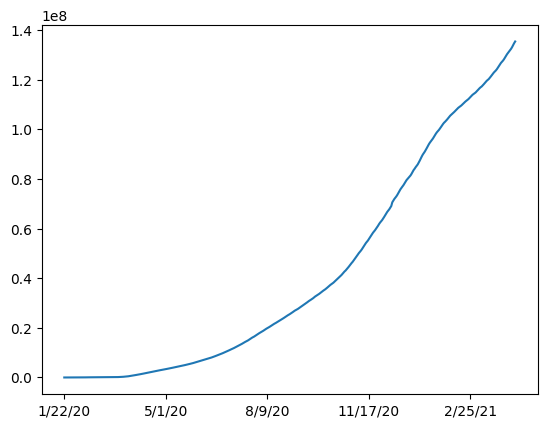

In [29]:
countries.drop(['Country/Region', 'CONTINENT'], axis=1).sum().plot()

<AxesSubplot: >

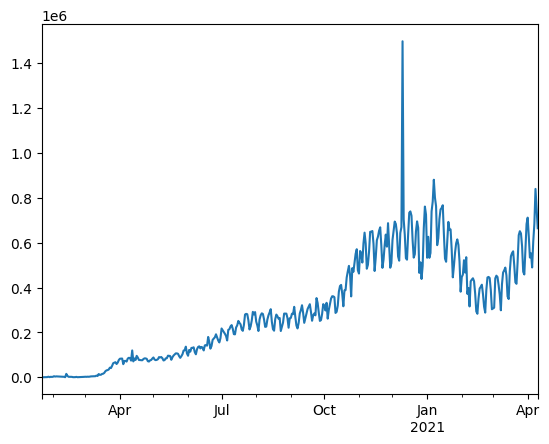

In [30]:
cas_par_jour_t.sum(axis=1).plot()

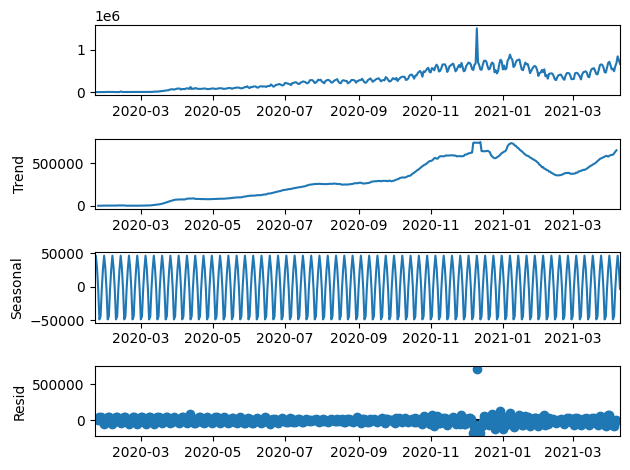

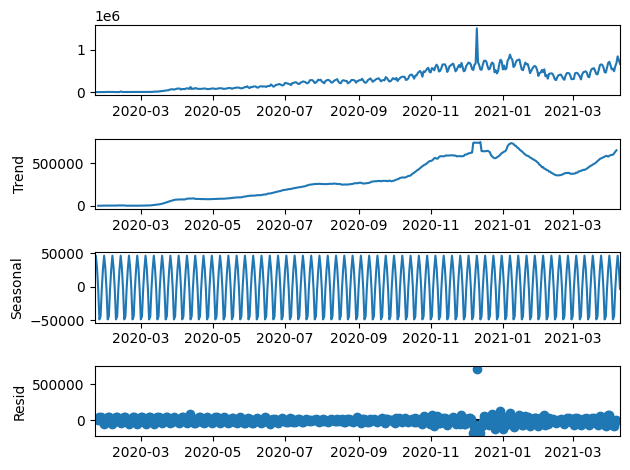

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_series = seasonal_decompose(cas_par_jour_t.sum(axis=1), model='additive')
decomp_series.plot()

In [32]:
countries.drop(['Country/Region', 'CONTINENT'], axis=1).sum()

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
4/6/21     132419139
4/7/21     133103485
4/8/21     133943335
4/9/21     134691380
4/10/21    135355885
Length: 445, dtype: int64

## 4. Share any other interesting insights you find relevant.

In [33]:
import plotly.express as px


cas_par_pays = pd.concat([cas_par_jour['Country/Region'], cas_par_jour.drop(['CONTINENT'], axis=1).sum(axis=1)], axis=1)

fig = px.bar(cas_par_pays, x='Country/Region', y=0, title='Nombre total de cas de COVID-19 par pays')

fig.show()

## 5. Using the package statsmodel, build an ARIMA model to forecast confirmed infections globally from April 10 to April 30, 2020.

In [34]:
world = countries.drop(['Country/Region', 'CONTINENT'], axis=1).sum()

In [35]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of the Dickey-Fuller Test:')

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','P-Value','Number of Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

In [36]:
adf_test(world)
# p value > 0.05 -> données non stationnaires

Results of the Dickey-Fuller Test:
Test Statistic                   1.266258
P-Value                          0.996413
Number of Lags Used             15.000000
Number of Observations Used    429.000000
Critical Value (1%)             -3.445685
Critical Value (5%)             -2.868301
Critical Value (10%)            -2.570371
dtype: float64


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

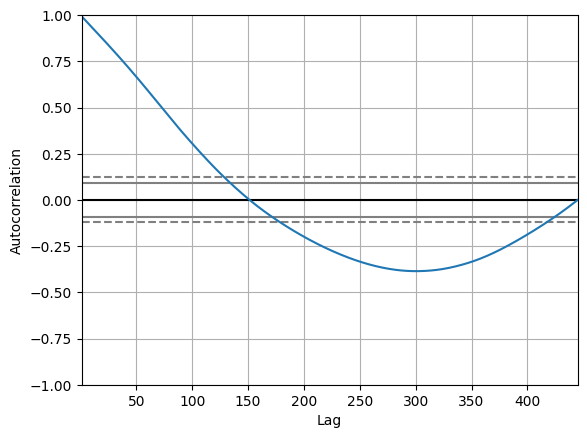

In [37]:
pd.plotting.autocorrelation_plot(world)

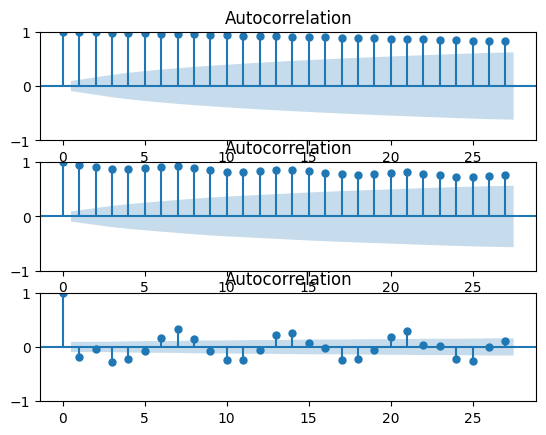

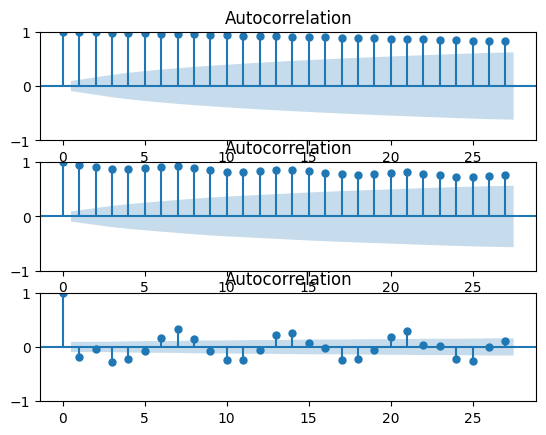

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(world, ax=ax1)
plot_acf(world.diff().dropna(), ax=ax2)
plot_acf(world.diff().diff().dropna(), ax=ax3)

In [39]:
import warnings
warnings.filterwarnings("ignore")
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [40]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):

	# Train/Test split
	train_size = int(len(X) * 0.75)

	train, test = X[0:train_size], X[train_size:]

	history = [x for x in train]

	# Make predictions
	predictions = []
	for t in range(len(test)):
		arima_model = ARIMA(history, order=arima_order)
		arima_model_fit = arima_model.fit()
		pred_y = arima_model_fit.forecast()[0]
		predictions.append(pred_y)
		history.append(test[t])

	# Calculate out-of-sample error
	error = mean_squared_error(test, predictions, squared=False)
	return error

In [41]:
def evaluate_models(data, p_params, d_params, q_params):
	data = data.astype('float32')
	best_score, best_cfg = float("inf"), None

	for p in p_params:
		for d in d_params:
			for q in q_params:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(data, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s - MSE = %.3f'% (order, mse))
				except:
					continue
	print('Best configuration: ARIMA%s - MSE Score: %.3f'% (best_cfg, best_score))

In [42]:
# evaluate parameters
p_params = range(1, 4)
d_params = range(1, 5)
q_params = range(1, 5)

warnings.filterwarnings("ignore")

In [ ]:
evaluate_models(world, 2, 2, 3)
# meilleur résultat : 2, 2, 3 -> RMSE : 56k

ARIMA(1, 1, 1) - MSE = 92001.559
ARIMA(1, 1, 2) - MSE = 81454.676
ARIMA(1, 1, 3) - MSE = 76818.576
ARIMA(1, 2, 1) - MSE = 80504.805
ARIMA(1, 3, 2) - MSE = 82641.441
ARIMA(1, 4, 2) - MSE = 85277.110
ARIMA(1, 4, 3) - MSE = 4997230117.264
ARIMA(1, 4, 4) - MSE = 26327053024.057
ARIMA(2, 1, 1) - MSE = 8806198.490
ARIMA(2, 1, 4) - MSE = 73517.420
ARIMA(2, 2, 1) - MSE = 78612.673
ARIMA(2, 3, 2) - MSE = 84753.341
ARIMA(2, 3, 3) - MSE = 329870648.228


In [ ]:
arima_model = ARIMA(world, order=(2,2,3))
arima_model_fit = arima_model.fit()

In [ ]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  445
Model:                 ARIMA(2, 2, 3)   Log Likelihood               -5451.046
Date:                Mon, 20 Mar 2023   AIC                          10914.092
Time:                        13:23:32   BIC                          10938.654
Sample:                    01-22-2020   HQIC                         10923.779
                         - 04-10-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2449      0.007    170.891      0.000       1.231       1.259
ar.L2         -0.9960      0.007   -147.178      0.000      -1.009      -0.983
ma.L1         -1.8711      0.019    -96.429      0.000      -1.909      -1.833
ma.L2          1.6997      0.034     49.361      0.000       1.632       1.767
ma.L3         -0.5863      0.028    -20.805      0.000      -0.642      -0.531
sigma2       3.41e+09   1.48e-12    2.3e+21      0.000    3.41e+09    3.41e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):            265329.83
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              96.69   Skew:                             7.37
Prob(H) (two-sided):                  0.00   Kurtosis:                       121.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.93e+36. Standard errors may be unstable.
"""

In [ ]:
result = arima_model_fit.predict(pd.to_datetime("2021-04-10"), pd.to_datetime("2021-04-30"))

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result.rename(columns={'predicted_mean': 'arima_result'}, inplace=True)

In [ ]:
result

,arima_result
2021-04-10,1.353274e+08
2021-04-11,1.359342e+08
2021-04-12,1.365154e+08
2021-04-13,1.371692e+08
2021-04-14,1.379106e+08
2021-04-15,1.386888e+08
2021-04-16,1.394254e+08
2021-04-17,1.400737e+08
2021-04-18,1.406535e+08
2021-04-19,1.412359e+08


## 6. [BONUS] Use the framework Prophet to forecast infections from April 10 to May 31, 2021.

In [ ]:
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.2/378.2 KB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.0 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732015 sha256=6bd28c36d24723cf348b52ab4668c94cf4a13ebec39511ac23f9217ed9cdbb5d
  Stored in directory: /root/.cache/pip/wheels/04/1f/e5/8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = pd.DataFrame(world)

In [ ]:
df_prophet.reset_index(inplace=True)

In [ ]:
df_prophet.rename(columns={'index':'ds', 0:'y'}, inplace=True)

In [ ]:
df_prophet.drop("level_0", axis=1, inplace=True)

In [ ]:
m = Prophet(interval_width=0.96)
m.fit(df_prophet)
future = m.make_future_dataframe(periods=51)
future.tail()

13:45:22 - cmdstanpy - INFO - Chain [1] start processing
13:45:22 - cmdstanpy - INFO - Chain [1] done processing


,ds
491,2021-05-27
492,2021-05-28
493,2021-05-29
494,2021-05-30
495,2021-05-31


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(51)

,ds,yhat,yhat_lower,yhat_upper
445,2021-04-11,1.338679e+08,1.329208e+08,1.347962e+08
446,2021-04-12,1.342821e+08,1.333743e+08,1.351856e+08
447,2021-04-13,1.347415e+08,1.338218e+08,1.356254e+08
448,2021-04-14,1.352332e+08,1.342501e+08,1.361468e+08
449,2021-04-15,1.357466e+08,1.346938e+08,1.366514e+08
450,2021-04-16,1.362412e+08,1.352950e+08,1.371558e+08
451,2021-04-17,1.367027e+08,1.357322e+08,1.376786e+08
452,2021-04-18,1.370865e+08,1.361412e+08,1.380657e+08
453,2021-04-19,1.375007e+08,1.364955e+08,1.384525e+08
454,2021-04-20,1.379600e+08,1.368437e+08,1.390238e+08


In [ ]:
final_result = forecast[['ds', 'yhat']].tail(51).set_index('ds')

In [ ]:
final_result['arima_result'] = result['arima_result'].astype('int32')

In [ ]:
final_result.rename(columns={'yhat': 'prophet_result'}, inplace=True)
final_result = final_result.apply(lambda x: round(x))

In [ ]:
final_result

,prophet_result,arima_result
ds,,
2021-04-11,133867917.0,135934244.0
2021-04-12,134282112.0,136515419.0
2021-04-13,134741468.0,137169224.0
2021-04-14,135233164.0,137910640.0
2021-04-15,135746580.0,138688788.0
2021-04-16,136241151.0,139425399.0
2021-04-17,136702678.0,140073715.0
2021-04-18,137086461.0,140653482.0
2021-04-19,137500656.0,141235855.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a47525c-1879-4b67-861c-6d25638d4eea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>